# Minist Dataset Example

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [18]:
X_train[0].shape

(28, 28)

<Figure size 432x288 with 0 Axes>

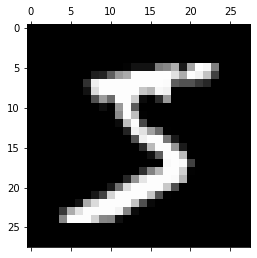

In [16]:
plt.gray() 
plt.matshow(X_train[0]) 
plt.show() 

In [17]:
y_train[0]

5

In [19]:
input_shape = (28, 28, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.33, random_state=42)

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2316 - accuracy: 0.9450 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.0539 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0584 - val_accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0422 - accuracy: 0.9877 - val_loss: 0.0626 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.0536 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0500 - val_accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0478 -

313/313 - 1s - loss: 0.0632 - accuracy: 0.9870 - 788ms/epoch - 3ms/step


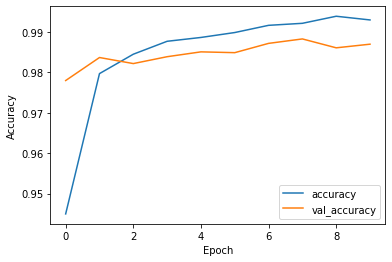

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)